In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import fnmatch

In [ ]:
output_dir = list(os.listdir('../output'))

In [ ]:
df_template = pd.read_csv(StringIO("""package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag"""))

In [ ]:
df_aux = df_template[:]
for file in output_dir:
    df_aux = pd.concat([df_aux,pd.read_csv('../output/' + file)])

In [ ]:
df_aux['cost'] = df_aux.index

In [ ]:
df_aux["approach"] = df_aux.apply(lambda x: "agnostic" if (x.strategy == "Random Sampling")  else "non agnostic", axis=1)

In [ ]:
df_aux = df_aux \
.replace("Lowest H, Highest U Sampling", "HU") \
.replace("Lowest F3 Sampling", "F3") \
.replace("Lowest N1 Sampling", "N1") \
.replace("Highest LSC Sampling", "LSC") \
.replace("Query by Committee", "QBC") \
.replace("Highest Usefulness Sampling", "U") \
.replace("Random Sampling", "RS") \
.replace("Lowest Harmfulness Sampling", "H") \
.replace("Expected Model Change", "EMC") \
.replace("Uncertain Sampling", "US") \
.replace("upyhard", "pyHard") \
.replace("Pyhard", "pyHard")

In [ ]:
df_aux["package"] = df_aux.apply(lambda x: "Baseline" if (x.strategy == "RS") else "Clássica" if (x.package == "modAL")  else "Proposta", axis=1)

In [ ]:
df_aux["dataset"] = df_aux["dataset"].apply(lambda x: x.split(sep="_")[0])

In [ ]:
df_aux['accuracy_history'] = df_aux['accuracy_history'] *100
df_aux['f1_history'] = df_aux['f1_history'] *100
df_aux['sample_size'] = df_aux['sample_size'] *100

In [ ]:
df_aux

In [ ]:
df_all.to_csv("./compilation_values.csv", index = False)

## CSV Compilado pronto

In [2]:
df_all = pd.read_csv("./compilation_values.csv")

In [3]:
df_all

,package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag,cost,approach
0,Clássica,54.418267,5NN,68.215695,EMC,1043,77.108434,76.178276,0,0,non agnostic
1,Clássica,54.418267,5NN,68.215695,EMC,1043,77.108434,75.493640,0,1,non agnostic
2,Clássica,54.418267,5NN,68.215695,EMC,1043,77.546550,75.792694,0,2,non agnostic
3,Clássica,54.418267,5NN,68.215695,EMC,1043,77.984666,76.794328,0,3,non agnostic
4,Clássica,54.418267,5NN,68.215695,EMC,1043,77.108434,75.493640,0,4,non agnostic
...,...,...,...,...,...,...,...,...,...,...,...
269795,Proposta,177.204027,RF,100.000000,F3,60,82.300000,85.315712,4,14,non agnostic
269796,Proposta,177.204027,RF,100.000000,F3,60,82.100000,85.666909,4,15,non agnostic
269797,Proposta,177.204027,RF,100.000000,F3,60,82.200000,85.306239,4,16,non agnostic
269798,Proposta,177.204027,RF,100.000000,F3,60,82.300000,85.614706,4,17,non agnostic


In [5]:
df_all['strategy'].value_counts()

F3     26980
LSC    26980
H      26980
HU     26980
US     26980
QBC    26980
U      26980
RS     26980
N1     26980
EMC    26980
Name: strategy, dtype: int64

In [6]:
df_all = df_all[df_all.strategy != 'QBC']

In [7]:
df_all.rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"}).head(50)

,Pacote,Tempo de execução,Classificador,Tamanho da amostra,Estratégia,Conjunto de dados,Acurácia,F1,Index da bag,Orçamento,Abordagem
0,Clássica,54.418267,5NN,68.215695,EMC,1043,77.108434,76.178276,0,0,non agnostic
1,Clássica,54.418267,5NN,68.215695,EMC,1043,77.108434,75.493640,0,1,non agnostic
2,Clássica,54.418267,5NN,68.215695,EMC,1043,77.546550,75.792694,0,2,non agnostic
3,Clássica,54.418267,5NN,68.215695,EMC,1043,77.984666,76.794328,0,3,non agnostic
4,Clássica,54.418267,5NN,68.215695,EMC,1043,77.108434,75.493640,0,4,non agnostic
5,Clássica,54.418267,5NN,68.215695,EMC,1043,77.546550,75.906799,0,5,non agnostic
6,Clássica,54.418267,5NN,68.215695,EMC,1043,78.532311,76.827698,0,6,non agnostic
7,Clássica,54.418267,5NN,68.215695,EMC,1043,78.860898,76.299440,0,7,non agnostic
8,Clássica,54.418267,5NN,68.215695,EMC,1043,77.108434,75.493640,0,8,non agnostic
9,Clássica,54.418267,5NN,68.215695,EMC,1043,78.422782,77.398117,0,9,non agnostic


### Groupby por dataset

In [8]:
df = df_all[:]

In [9]:
# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

In [10]:
df \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False).reset_index() \
.rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})

,Conjunto de dados,Pacote,Estratégia,Classificador,Tempo de execução,Tamanho da amostra,Acurácia,F1
0,1526,Clássica,EMC,C4.5,1.699880,41.015396,99.962406,99.958443
1,1526,Clássica,EMC,RF,71.136009,58.027859,99.919028,99.904578
2,1526,Proposta,N1,C4.5,172.304386,99.908341,99.935415,99.879422
3,1526,Proposta,F3,C4.5,120.183286,99.908341,99.944091,99.875468
4,1526,Clássica,US,C4.5,0.954892,7.991202,99.871795,99.867841
...,...,...,...,...,...,...,...,...
2551,1475,Clássica,US,NB,3.038208,17.996077,19.676643,17.431551
2552,1475,Proposta,LSC,NB,156.435788,99.734369,18.971448,17.162732
2553,1475,Proposta,F3,NB,174.516157,99.734369,18.823529,16.386698
2554,1475,Proposta,U,NB,149.874417,99.734369,17.874097,15.126285


In [11]:
df_all[df_all.strategy != 'Expected Error Reduction'] \
.drop(['dataset', 'id_bag','cost'], axis=1) \
.groupby(['package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False) \
.reset_index() \
.rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})

,Pacote,Estratégia,Classificador,Tempo de execução,Tamanho da amostra,Acurácia,F1
0,Proposta,LSC,RF,212.885132,99.375485,83.160469,85.374693
1,Proposta,U,RF,217.508133,99.375485,82.999354,85.126088
2,Proposta,HU,RF,217.484370,99.375485,82.984574,85.046554
3,Proposta,H,RF,226.954043,99.375485,82.314360,83.993075
4,Proposta,N1,RF,206.383301,99.375485,82.188875,83.927306
5,Proposta,F3,RF,190.814581,99.375485,82.224548,83.838969
6,Clássica,US,RF,25.073215,38.211180,83.261933,82.314711
7,Proposta,U,C4.5,151.950588,99.375485,77.898801,81.325051
8,Proposta,LSC,C4.5,156.678156,99.375485,77.818729,81.311654
9,Clássica,EMC,RF,67.128868,69.066329,82.363427,81.284216


In [12]:
df_all \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.std() \
.sort_values("f1_history", ascending = False) \
.reset_index() \
.rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})

,Conjunto de dados,Pacote,Estratégia,Classificador,Tempo de execução,Tamanho da amostra,Acurácia,F1
0,1050,Proposta,F3,NB,0.213075,0.000000,30.733091,34.562637
1,1050,Proposta,HU,NB,2.386096,0.000000,30.292524,34.102923
2,1050,Proposta,H,NB,1.048675,0.000000,27.901690,32.279258
3,1050,Clássica,US,NB,0.089361,4.064957,28.882721,31.800914
4,1050,Proposta,LSC,NB,0.825930,0.000000,28.648954,31.784806
...,...,...,...,...,...,...,...,...
2551,1069,Proposta,H,5NN,2.260617,0.000000,0.000000,0.000000
2552,1069,Proposta,HU,5NN,4.141649,0.000000,0.000000,0.000000
2553,1056,Proposta,F3,5NN,3.521786,0.000000,0.000000,0.000000
2554,1069,Proposta,F3,5NN,3.295509,0.000000,0.000000,0.000000


## Boxplot

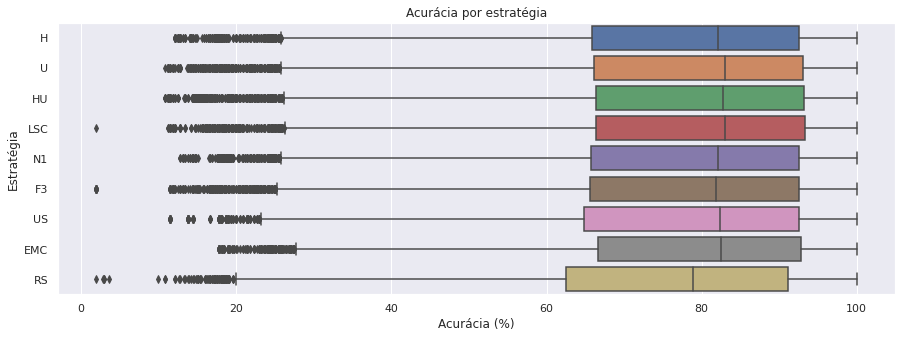

In [13]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.boxplot(data=df_all, x="accuracy_history", y="strategy", orient="h", order = ["H", "U", "HU", "LSC", "N1", "F3", "US", "EMC", "RS"]) \
.set(xlabel='Acurácia (%)', ylabel='Estratégia', title = "Acurácia por estratégia")

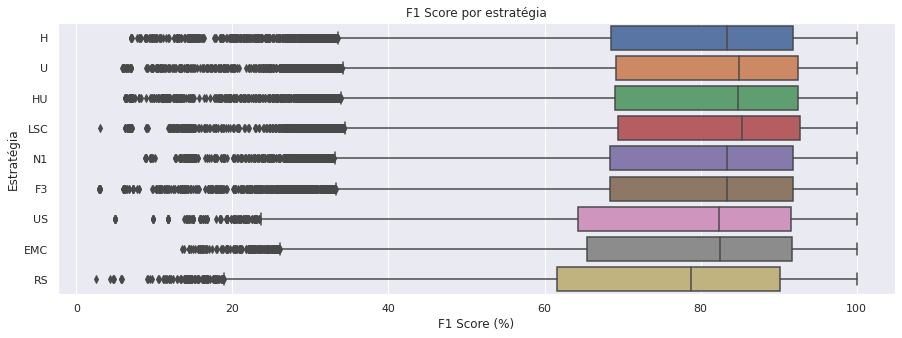

In [14]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.boxplot(data=df_all, x="f1_history", y="strategy", orient="h", order = ["H", "U", "HU", "LSC", "N1", "F3", "US", "EMC", "RS"]) \
.set(xlabel='F1 Score (%)', ylabel='Estratégia', title = "F1 Score por estratégia")

## Testes (lineplot)

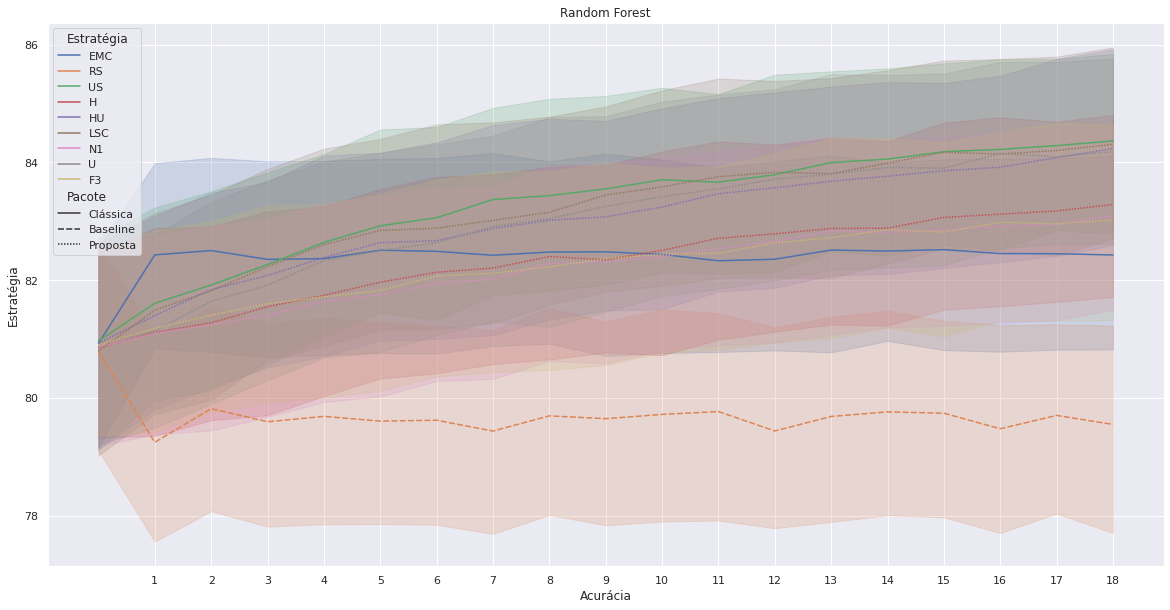

In [15]:
# Plot the responses for different events and regions
data = df_all[(df_all.classifier == "RF")].rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})
sns.set(rc={'figure.figsize':(20,10)})
_ = sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", data = data).set(xlabel='Acurácia', ylabel='Estratégia', xticks = range(1,19), title = "Random Forest")

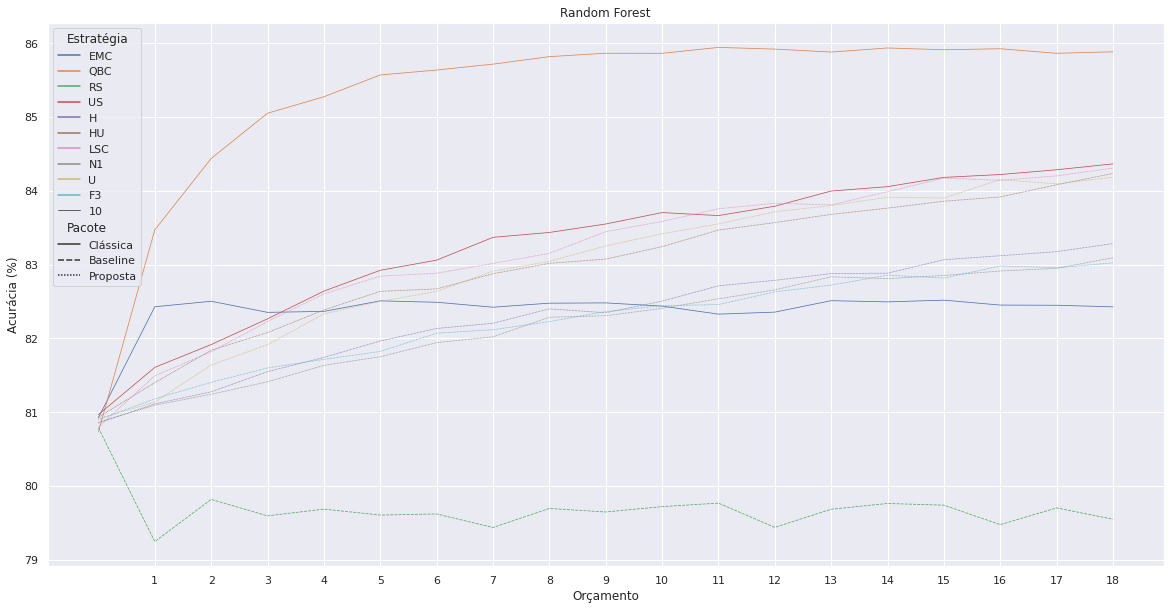

In [14]:
# Plot the responses for different events and regions
data = df_all[(df_all.classifier == "RF")].rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})
sns.set(rc={'figure.figsize':(20,10)})
_ = sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", ci=None, data = data, size=10).set(xlabel='Orçamento', ylabel='Acurácia (%)', xticks = range(1,19), title = "Random Forest")

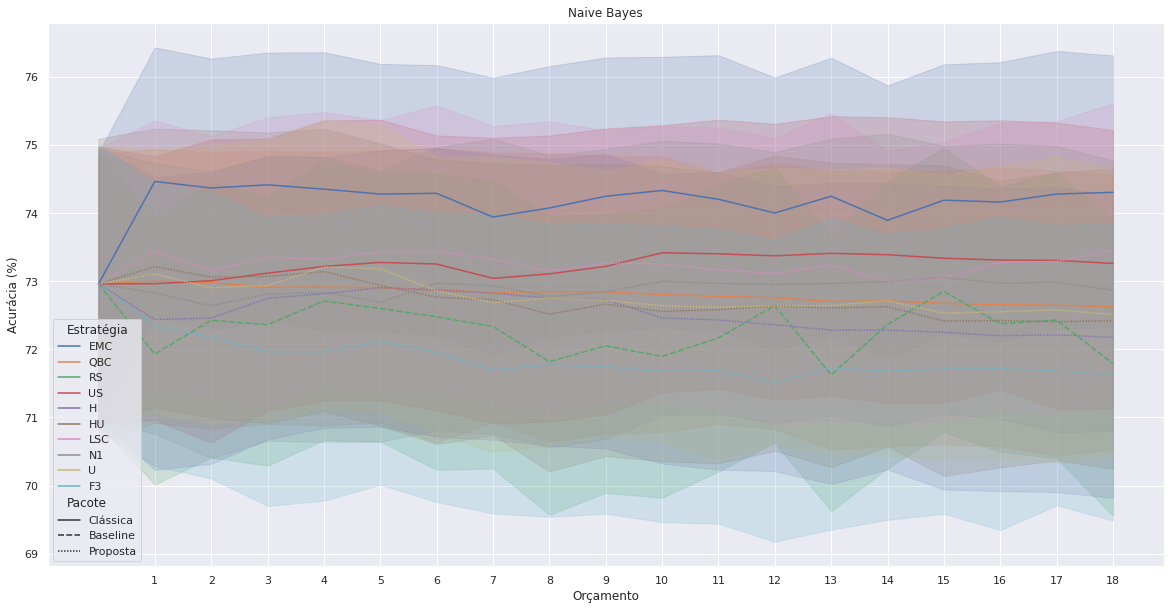

In [15]:
# Plot the responses for different events and regions
data = df_all[(df_all.classifier == "NB")].rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})
sns.set(rc={'figure.figsize':(20,10)})
_ = sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", data = data).set(xlabel='Orçamento', ylabel='Acurácia (%)', xticks = range(1,19), title = "Naive Bayes")

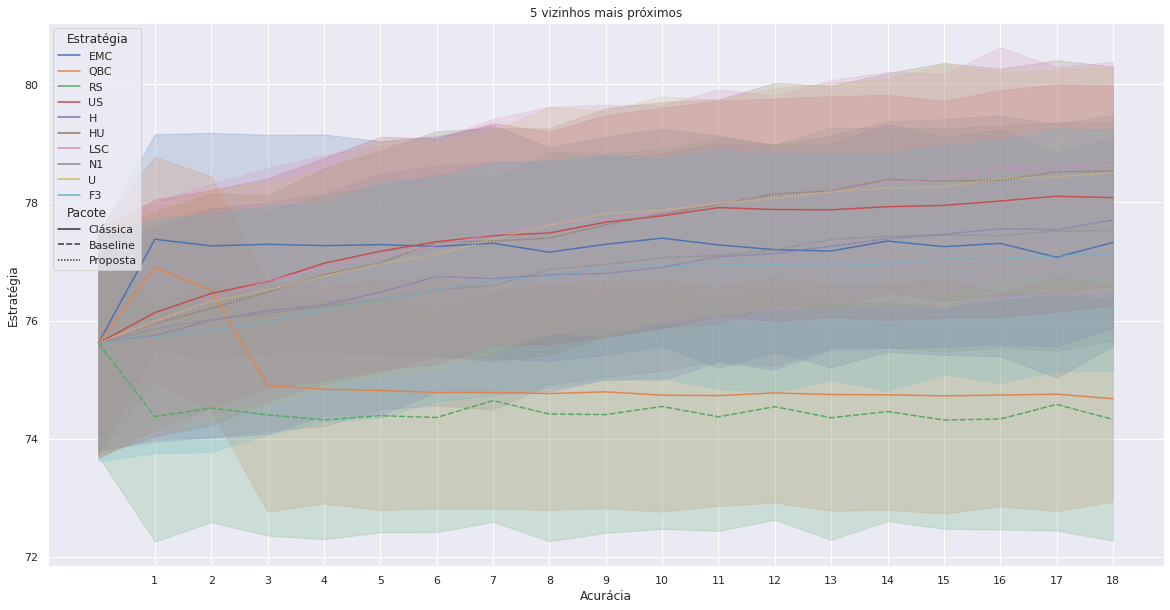

In [16]:
# Plot the responses for different events and regions
data = df_all[(df_all.classifier == "5NN")].rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})
sns.set(rc={'figure.figsize':(20,10)})
_ = sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", data = data).set(xlabel='Acurácia', ylabel='Estratégia', xticks = range(1,19), title = "5 vizinhos mais próximos")

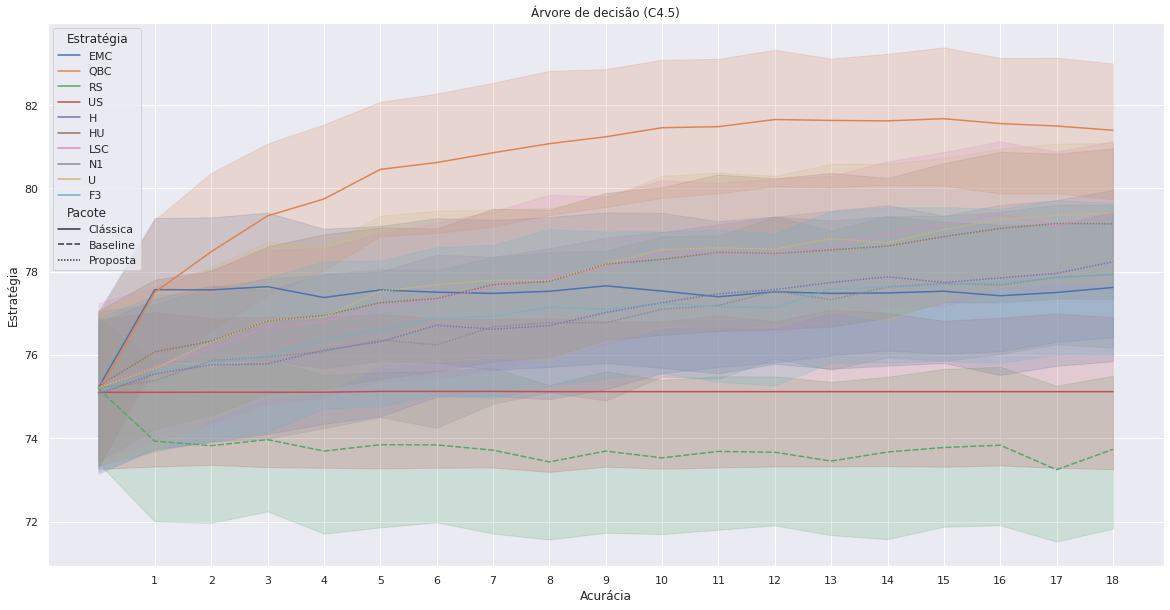

In [17]:
# Plot the responses for different events and regions
data = df_all[(df_all.classifier == "C4.5")].rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})
sns.set(rc={'figure.figsize':(20,10)})
_ = sns.lineplot(x="Orçamento", y="Acurácia", hue="Estratégia", style="Pacote", data = data).set(xlabel='Acurácia', ylabel='Estratégia', xticks = range(1,19), title = "Árvore de decisão (C4.5)")
sns.set_style('darkgrid', {'legend.frameon':True})

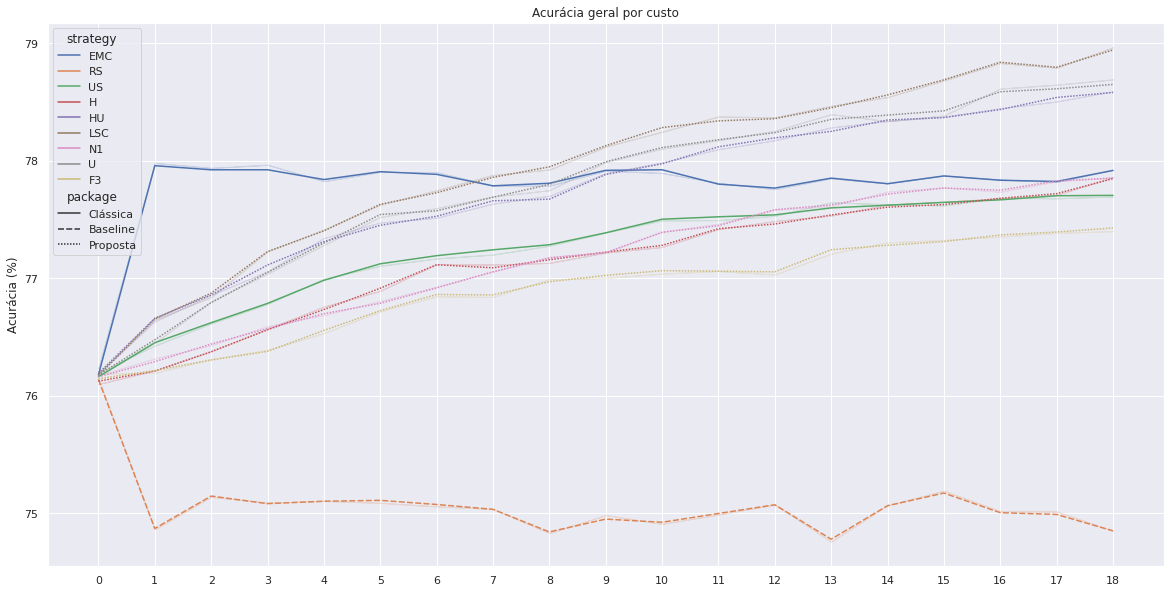

In [17]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.lineplot(x="cost", y="accuracy_history", hue="strategy", style="package", ci = False, data=df_all).set(xlabel='', ylabel='Acurácia (%)', xticks = range(0,19),  title = "Acurácia geral por custo")
plt.show()

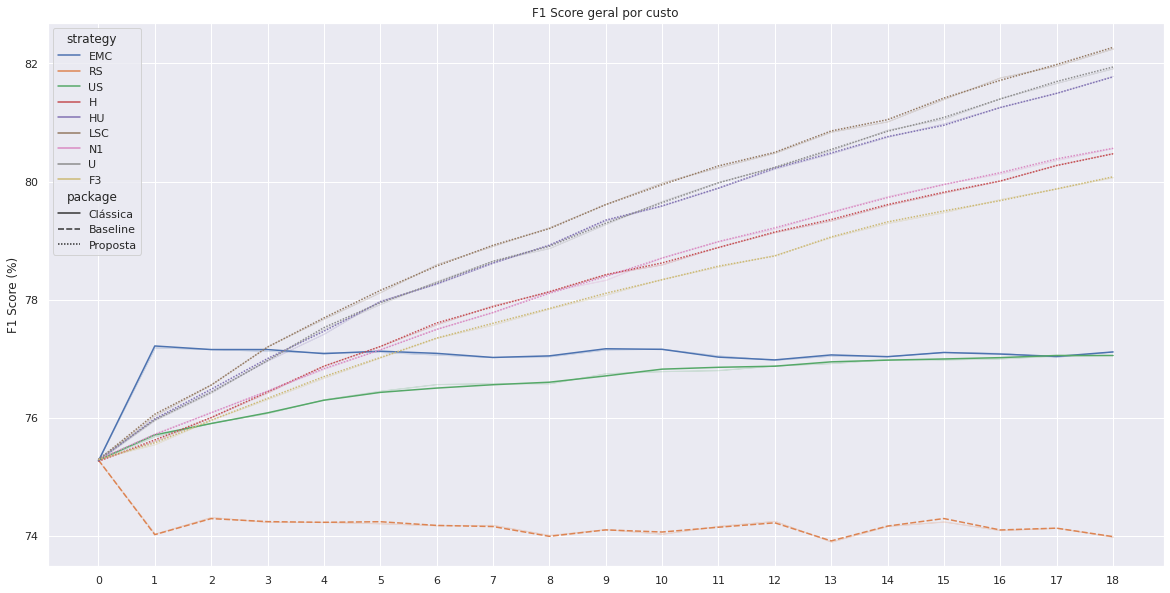

In [18]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.lineplot(x="cost", y="f1_history", hue="strategy", style="package", ci = False, data=df_all).set(xlabel='', ylabel='F1 Score (%)', xticks = range(0,19),  title = "F1 Score geral por custo")
plt.show()

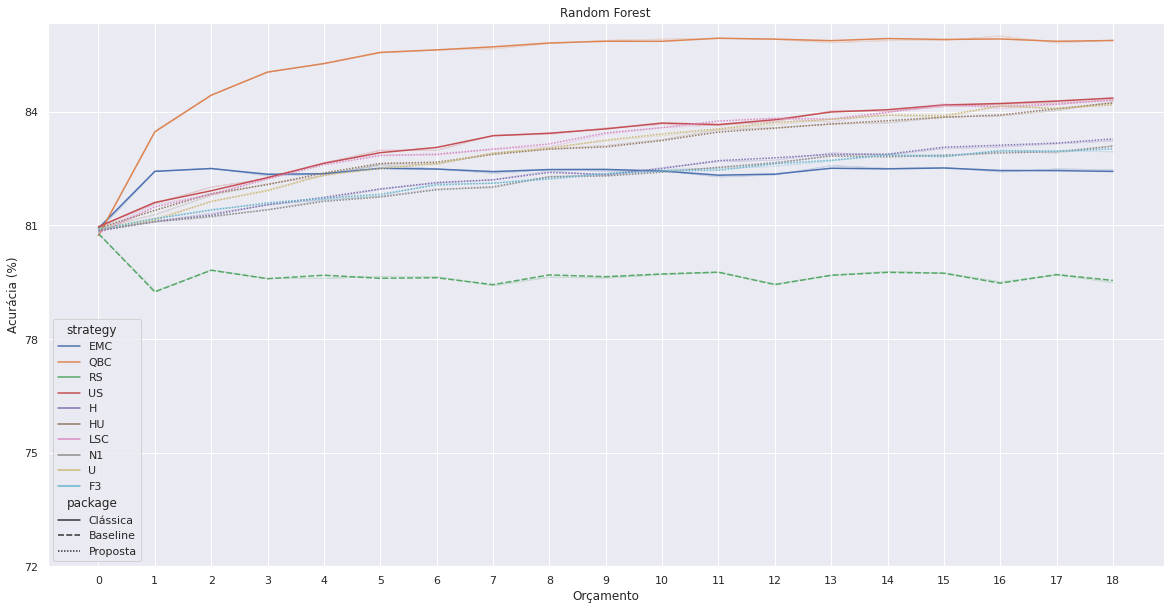

In [19]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.lineplot(x="cost", y="accuracy_history", ci = False, hue="strategy", style="package", data=df_all[(df_all.classifier == "RF")]).set(xlabel='Orçamento', ylabel='Acurácia (%)', xticks = range(0,19), yticks = range(72,87,3), title = "Random Forest")

plt.show()

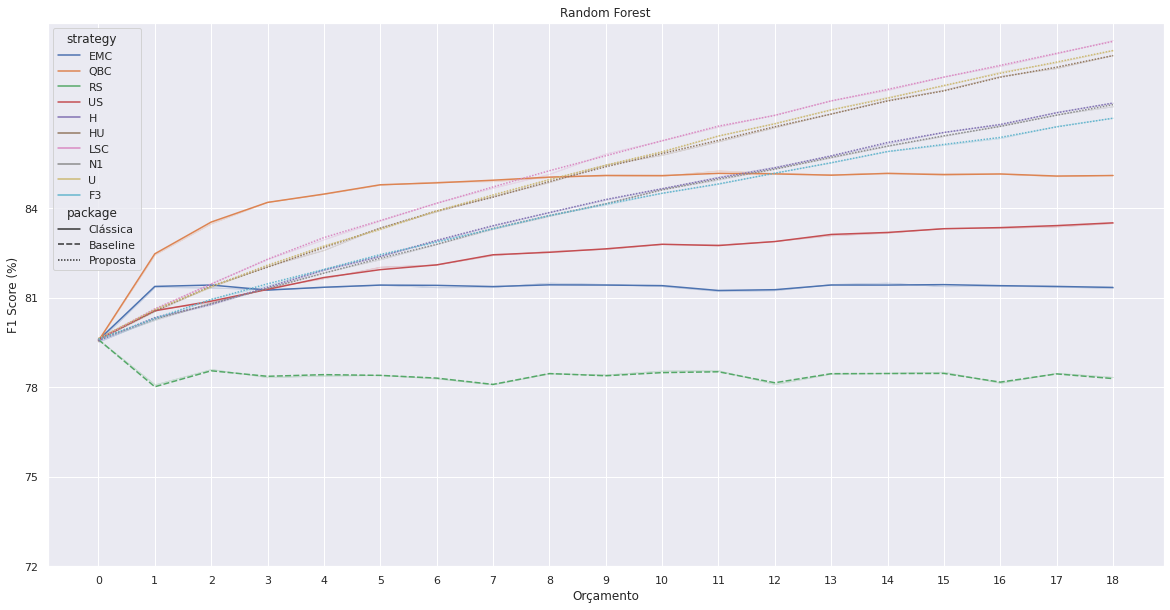

In [20]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.lineplot(x="cost", y="f1_history", ci = False, hue="strategy", style="package", data=df_all[(df_all.classifier == "RF")]).set(xlabel='Orçamento', ylabel='F1 Score (%)', xticks = range(0,19), yticks = range(72,87,3), title = "Random Forest")

plt.show()

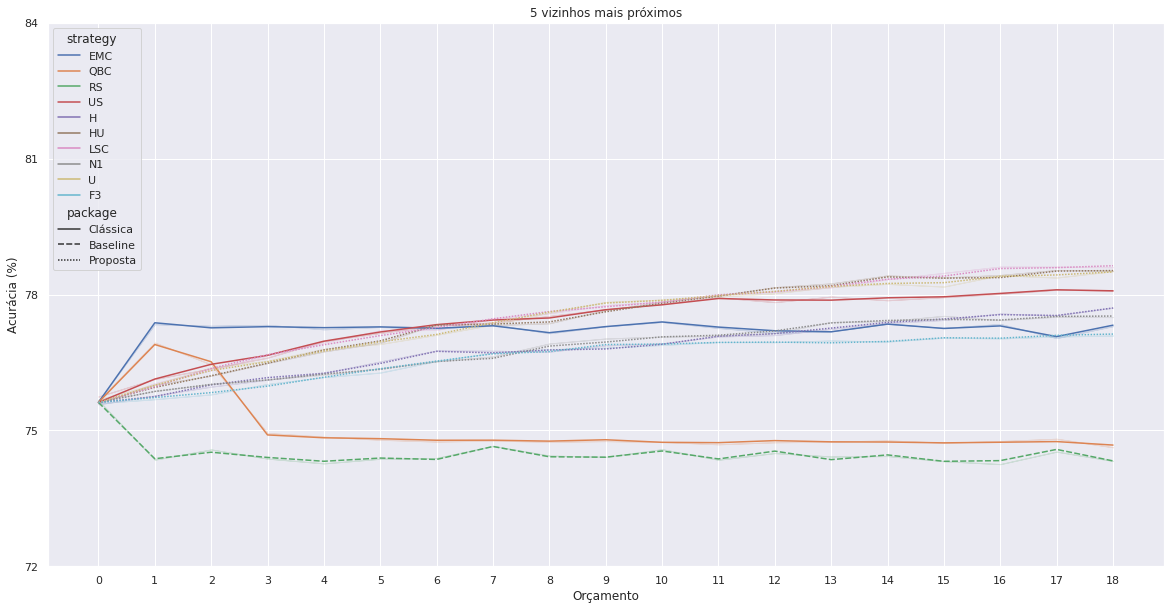

In [21]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.lineplot(x="cost", y="accuracy_history", ci = False, hue="strategy", style="package", data=df_all[(df_all.classifier == "5NN")]).set(xlabel='Orçamento', ylabel='Acurácia (%)', xticks = range(0,19), yticks = range(72,87,3), title = "5 vizinhos mais próximos")

plt.show()

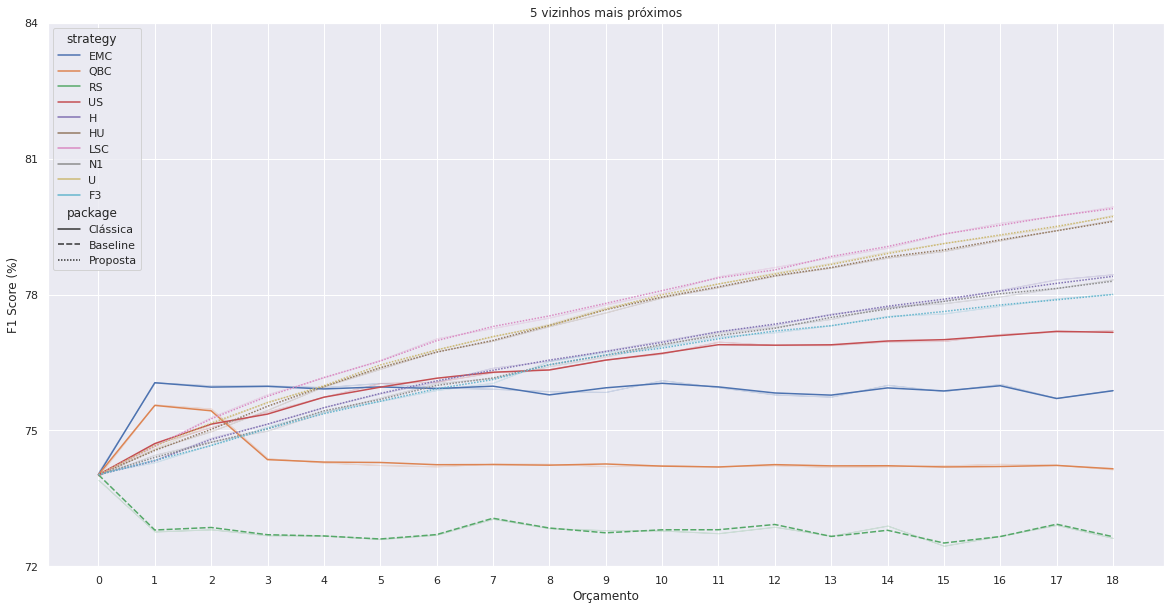

In [22]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.lineplot(x="cost", y="f1_history", ci = False, hue="strategy", style="package", data=df_all[(df_all.classifier == "5NN")]).set(xlabel='Orçamento', ylabel='F1 Score (%)', xticks = range(0,19), yticks = range(72,87,3), title = "5 vizinhos mais próximos")

plt.show()

In [ ]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.lineplot(x="cost", y="accuracy_history", ci = False, hue="strategy", style="package", data=df_all[(df_all.classifier == "C4.5")]).set(xlabel='Orçamento', ylabel='Acurácia (%)', xticks = range(0,19), yticks = range(72,87,3), title = "Árvore de decisão (C4.5)")

plt.show()

In [ ]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.lineplot(x="cost", y="f1_history", ci = False, hue="strategy", style="package", data=df_all[(df_all.classifier == "C4.5")]).set(xlabel='Orçamento', ylabel='F1 Score (%)', xticks = range(0,19), yticks = range(72,87,3), title = "Árvore de decisão (C4.5)")

plt.show()

In [ ]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.lineplot(x="cost", y="accuracy_history", ci = False, hue="strategy", style="package", data=df_all[(df_all.classifier == "NB")]).set(xlabel='Orçamento', ylabel='Acurácia (%)', xticks = range(0,19), yticks = range(72,87,3), title = "Naive Bayes")

plt.show()

In [ ]:
fig, axs = plt.subplots(figsize=(20, 10))

sns.lineplot(x="cost", y="f1_history", ci = False, hue="strategy", style="package", data=df_all[(df_all.classifier == "NB")]).set(xlabel='Orçamento', ylabel='F1 Score (%)', xticks = range(0,19), yticks = range(72,87,3), title = "Naive Bayes")

plt.show()

In [ ]:
import os
len(os.listdir("../datasets"))

## Heatmap

In [4]:
df_all.groupby(['strategy','classifier']).std() \
.reset_index() \
.rename(columns={"package": "Pacote", "time_elapsed": "Tempo de execução", "classifier": "Classificador", "sample_size": "Tamanho da amostra", "strategy": "Estratégia","dataset": "Conjunto de dados", "accuracy_history": "Acurácia", "f1_history": "F1", "id_bag": "Index da bag", "cost": "Orçamento", "approach":"Abordagem"})

,Estratégia,Classificador,Tempo de execução,Tamanho da amostra,Conjunto de dados,Acurácia,F1,Index da bag,Orçamento
0,EMC,5NN,38.955154,34.640283,6604.897544,17.949095,18.125718,1.414318,5.477632
1,EMC,C4.5,12.509034,28.034936,6604.897544,17.026839,17.079578,1.414318,5.477632
2,EMC,NB,12.009323,28.333313,6604.897544,19.376888,20.226320,1.414318,5.477632
3,EMC,RF,13.220681,29.424631,6604.897544,15.851595,16.186431,1.414318,5.477632
4,F3,5NN,93.528777,0.919199,6604.897544,18.912215,18.171719,1.414318,5.477632
5,F3,C4.5,92.482128,0.919199,6604.897544,17.602880,15.724037,1.414318,5.477632
6,F3,NB,92.476513,0.919199,6604.897544,20.721242,21.621371,1.414318,5.477632
7,F3,RF,89.741115,0.919199,6604.897544,16.131786,14.294513,1.414318,5.477632
8,H,5NN,70.994059,0.919199,6604.897544,18.465674,17.822642,1.414318,5.477632
9,H,C4.5,48.238794,0.919199,6604.897544,17.067213,15.197411,1.414318,5.477632


[Text(0.5, 21.5, 'Classificador'),
 Text(111.5, 0.5, 'Estratégia'),
 Text(0.5, 1.0, 'Acurácia (%)')]

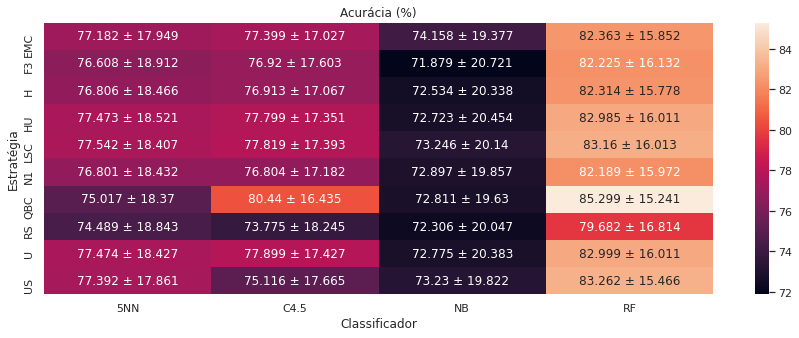

In [5]:
X = pd.pivot_table(df_all, values='accuracy_history', index=['strategy'], columns='classifier')
Y = pd.pivot_table(df_all.groupby(['strategy','classifier']).mean(), values='accuracy_history', index=['strategy'], columns='classifier')
Z = pd.pivot_table(df_all.groupby(['strategy','classifier']).std(), values='accuracy_history', index=['strategy'], columns='classifier')

R = Y[:]
for col in Z.columns:
    R[col] = Y[col].round(3).astype(str) + " ± " + Z[col].round(3).astype(str)

sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(X, annot=False).set(xlabel='Classificador', ylabel='Estratégia', title = "Acurácia (%)")
sns.heatmap(X, annot=R, fmt="", cbar=False).set(xlabel='Classificador', ylabel='Estratégia', title = "Acurácia (%)")
#sns.heatmap(X, annot=Z, annot_kws={'va':'top'}, fmt=".2f", cbar=False).set(xlabel='Classificador', ylabel='Estratégia', title = "F1")

[Text(0.5, 21.5, 'Classificador'),
 Text(111.5, 0.5, 'Estratégia'),
 Text(0.5, 1.0, 'Acurácia (%)')]

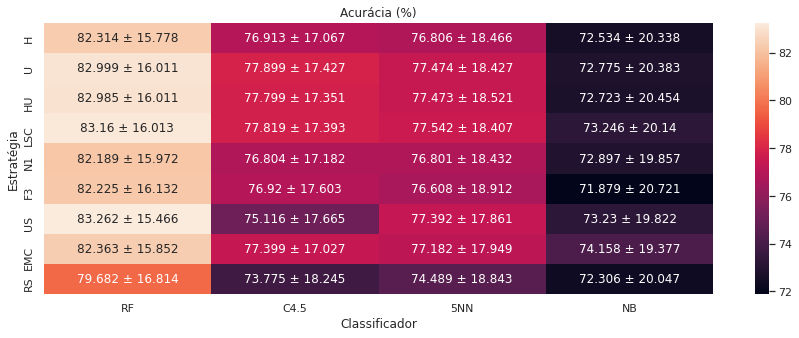

In [6]:
X = pd.pivot_table(df_all, values='accuracy_history', index=['strategy'], columns='classifier')
Y = pd.pivot_table(df_all.groupby(['strategy','classifier']).mean(), values='accuracy_history', index=['strategy'], columns='classifier')
Z = pd.pivot_table(df_all.groupby(['strategy','classifier']).std(), values='accuracy_history', index=['strategy'], columns='classifier')

R = Y[:]
for col in Z.columns:
    R[col] = Y[col].round(3).astype(str) + " ± " + Z[col].round(3).astype(str)

X = X.reindex(columns= ["RF", "C4.5", "5NN", "NB"],index= ["H", "U", "HU", "LSC", "N1", "F3", "US", "EMC", "RS"])
R = R.reindex(columns= ["RF", "C4.5", "5NN", "NB"],index= ["H", "U", "HU", "LSC", "N1", "F3", "US", "EMC", "RS"])  

sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(X, annot=False).set(xlabel='Classificador', ylabel='Estratégia', title = "Acurácia (%)")
sns.heatmap(X, annot=R, fmt="", cbar=False).set(xlabel='Classificador', ylabel='Estratégia', title = "Acurácia (%)")
#sns.heatmap(X, annot=Z, annot_kws={'va':'top'}, fmt=".2f", cbar=False).set(xlabel='Classificador', ylabel='Estratégia', title = "F1")

[Text(0.5, 21.5, 'Classificador'),
 Text(111.5, 0.5, 'Estratégia'),
 Text(0.5, 1.0, 'F1 Score (%)')]

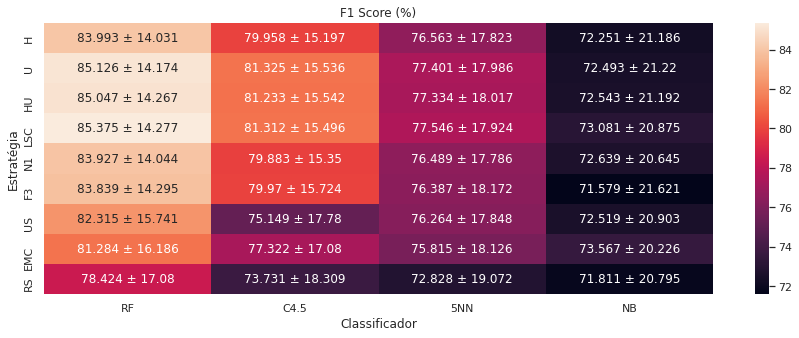

In [7]:
X = pd.pivot_table(df_all, values='f1_history', index=['strategy'], columns='classifier')
Y = pd.pivot_table(df_all.groupby(['strategy','classifier']).mean(), values='f1_history', index=['strategy'], columns='classifier')
Z = pd.pivot_table(df_all.groupby(['strategy','classifier']).std(), values='f1_history', index=['strategy'], columns='classifier')

R = Y[:]
for col in Z.columns:
    R[col] = Y[col].round(3).astype(str) + " ± " + Z[col].round(3).astype(str)

X = X.reindex(columns= ["RF", "C4.5", "5NN", "NB"],index= ["H", "U", "HU", "LSC", "N1", "F3", "US", "EMC", "RS"])  
R = R.reindex(columns= ["RF", "C4.5", "5NN", "NB"],index= ["H", "U", "HU", "LSC", "N1", "F3", "US", "EMC", "RS"])
    
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(X, annot=False).set(xlabel='Classificador', ylabel='Estratégia', title = "F1 Score (%)")
sns.heatmap(X, annot=R, fmt="", cbar=False).set(xlabel='Classificador', ylabel='Estratégia', title = "F1 Score (%)")
#sns.heatmap(X, annot=Z, annot_kws={'va':'top'}, fmt=".2f", cbar=False).set(xlabel='Classificador', ylabel='Estratégia', title = "F1")

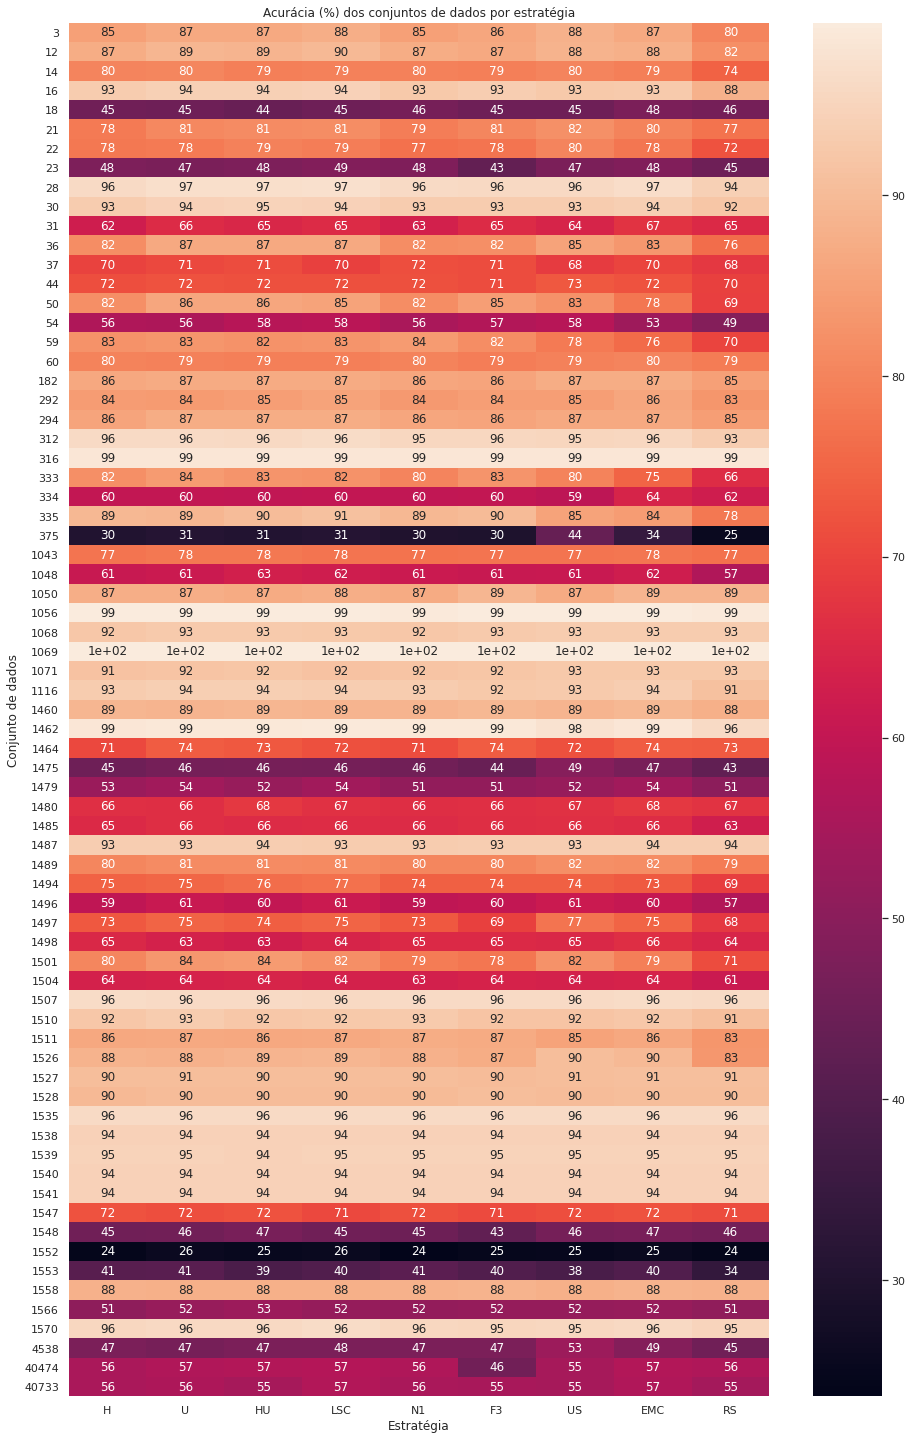

In [17]:
sns.set(rc={'figure.figsize':(15.7,25.27)})
heatmap_data = pd.pivot_table(df_all[(df_all.classifier == "5NN")], values='accuracy_history', index=['dataset'], columns='strategy')


heatmap_data = heatmap_data.reindex(columns= ["H", "U", "HU", "LSC", "N1", "F3", "US", "EMC", "RS"])

_ = sns.heatmap(heatmap_data, annot=True).set(xlabel='Estratégia', ylabel='Conjunto de dados', title = "Acurácia (%) dos conjuntos de dados por estratégia")

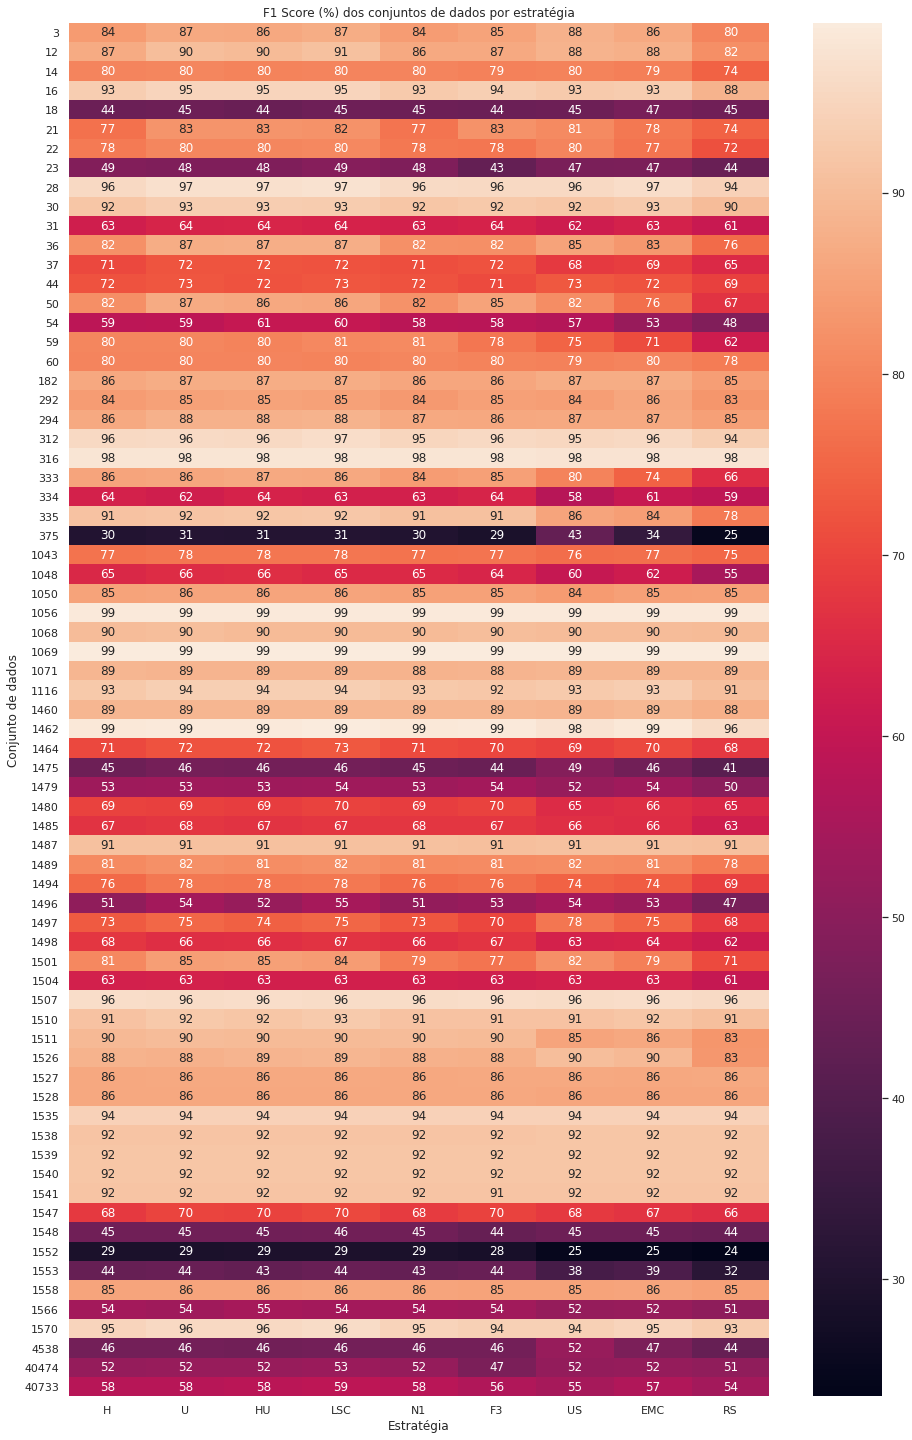

In [18]:
sns.set(rc={'figure.figsize':(15.7,25.27)})
heatmap_data = pd.pivot_table(df_all[(df_all.classifier == "5NN")], values='f1_history', index=['dataset'], columns='strategy')

heatmap_data = heatmap_data.reindex(columns= ["H", "U", "HU", "LSC", "N1", "F3", "US", "EMC", "RS"])

_ = sns.heatmap(heatmap_data, annot=True).set(xlabel='Estratégia', ylabel='Conjunto de dados', title = "F1 Score (%) dos conjuntos de dados por estratégia")

In [10]:
df = df_all.groupby(['dataset','strategy']).mean()
df["rank"] = df.groupby("dataset")["accuracy_history"].rank(ascending = False)
#df.groupby('strategy').mean()
df.head(30)

time_elapsed  sample_size  accuracy_history  f1_history  \
dataset strategy                                                            
3       EMC          31.239417    83.823529         86.080181   84.808705   
        F3          150.588611    99.413146         85.406250   83.994441   
        H           147.618239    99.413146         84.909951   83.570268   
        HU          153.659396    99.413146         85.096217   83.034487   
        LSC         149.960748    99.413146         85.975329   84.043158   
        N1          150.108629    99.413146         84.996711   83.832875   
        QBC         442.423452   233.729662         84.958470   82.930369   
        RS           19.762346    99.217772         83.442023   82.221734   
        U           148.631239    99.413146         84.511924   82.187412   
        US           10.636359    16.739675         85.831826   84.304707   
12      EMC          37.610796    90.500000         87.648026   87.588007   
        F3          602.420195   100.000000         86.652632   87.081924   
        H           226.819421   100.000000         87.128289   87.562777   
        HU          229.642797   100.000000         88.790789   90.398555   
        LSC         227.213427   100.000000         89.167763   90.823100   
        N1          231.407608   100.000000         87.284868   87.093806   
        QBC         468.910327   234.000000         89.661842   89.577087   
        RS           22.108426   107.000000         83.292105   83.243169   
        U           226.959050   100.000000         88.971711   90.614158   
        US           13.500248    22.750000         86.684868   86.613289   
14      EMC          27.035792    80.000000         73.784868   73.533520   
        F3          276.680035   100.000000         73.812500   75.300844   
        H           148.008855   100.000000         74.225000   75.673395   
        HU          147.797698   100.000000         73.683553   75.274544   
        LSC         145.688337   100.000000         73.971711   75.507170   
        N1          146.511306   100.000000         74.167105   75.583157   
        QBC         363.849959   234.000000         76.259211   76.230454   
        RS           18.038293   107.000000         68.933553   68.799778   
        U           147.887032   100.000000         73.817105   75.567919   
        US           11.839118    28.500000         72.961842   72.691573   

                  id_bag  cost  rank  
dataset strategy                      
3       EMC            2     9   1.0  
        F3             2     9   4.0  
        H              2     9   8.0  
        HU             2     9   5.0  
        LSC            2     9   2.0  
        N1             2     9   6.0  
        QBC            2     9   7.0  
        RS             2     9  10.0  
        U              2     9   9.0  
        US             2     9   3.0  
12      EMC            2     9   5.0  
        F3             2     9   9.0  
        H              2     9   7.0  
        HU             2     9   4.0  
        LSC            2     9   2.0  
        N1             2     9   6.0  
        QBC            2     9   1.0  
        RS             2     9  10.0  
        U              2     9   3.0  
        US             2     9   8.0  
14      EMC            2     9   7.0  
        F3             2     9   6.0  
        H              2     9   2.0  
        HU             2     9   8.0  
        LSC            2     9   4.0  
        N1             2     9   3.0  
        QBC            2     9   1.0  
        RS             2     9  10.0  
        U              2     9   5.0  
        US             2     9   9.0

In [11]:
df.groupby('strategy').mean().rank(method = 'first',ascending=True).sort_values(by='rank', ascending=True)['rank']

strategy
LSC     1.0
EMC     2.0
U       3.0
QBC     4.0
HU      5.0
US      6.0
H       7.0
N1      8.0
F3      9.0
RS     10.0
Name: rank, dtype: float64

In [12]:
df = df_all[:]

## Ranking

In [ ]:
data_acc = pd.pivot_table(df_all, values='accuracy_history', index=['dataset'], columns='strategy')
data_acc = data_acc.apply(lambda x: round(x, 2).rank(method = 'min', ascending = False),axis = 1)
data_acc = data_acc.mean().sort_values(ascending = True)

In [ ]:
pd.DataFrame(data = {"Acurácia":data_acc})

In [ ]:
data_f1 = pd.pivot_table(df_all, values='f1_history', index=['dataset'], columns='strategy')
data_f1 = data_f1.apply(lambda x: round(x, 2).rank(method = 'min', ascending = False),axis = 1)
data_f1 = data_f1.mean().sort_values(ascending = True)

In [ ]:
pd.DataFrame(data = {"F1 Score":data_f1})

## Análise temporal

In [4]:
df_all

,package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag,cost,approach
0,Clássica,54.418267,5NN,68.215695,EMC,1043,77.108434,76.178276,0,0,non agnostic
1,Clássica,54.418267,5NN,68.215695,EMC,1043,77.108434,75.493640,0,1,non agnostic
2,Clássica,54.418267,5NN,68.215695,EMC,1043,77.546550,75.792694,0,2,non agnostic
3,Clássica,54.418267,5NN,68.215695,EMC,1043,77.984666,76.794328,0,3,non agnostic
4,Clássica,54.418267,5NN,68.215695,EMC,1043,77.108434,75.493640,0,4,non agnostic
...,...,...,...,...,...,...,...,...,...,...,...
269795,Proposta,177.204027,RF,100.000000,F3,60,82.300000,85.315712,4,14,non agnostic
269796,Proposta,177.204027,RF,100.000000,F3,60,82.100000,85.666909,4,15,non agnostic
269797,Proposta,177.204027,RF,100.000000,F3,60,82.200000,85.306239,4,16,non agnostic
269798,Proposta,177.204027,RF,100.000000,F3,60,82.300000,85.614706,4,17,non agnostic


In [17]:
df_class = df_all[df_all.package != "Proposta"]
df_prop = df_all[df_all.package == "Proposta"]

In [10]:
df_class.groupby(["strategy"]).mean()

,time_elapsed,sample_size,dataset,accuracy_history,f1_history,id_bag,cost
strategy,,,,,,,
EMC,31.406649,63.111305,2078.366197,77.775787,76.996789,2.0,9.0
QBC,444.537864,234.046584,2078.366197,78.391924,77.830634,2.0,9.0
US,13.117399,25.030378,2078.366197,77.249994,76.561891,2.0,9.0


In [11]:
df_prop.groupby(["strategy"]).mean()

,time_elapsed,sample_size,dataset,accuracy_history,f1_history,id_bag,cost
strategy,,,,,,,
F3,175.110343,99.375485,2078.366197,76.907892,77.943838,2.0,9.0
H,182.490947,99.375485,2078.366197,77.141937,78.191082,2.0,9.0
HU,179.859333,99.375485,2078.366197,77.744654,79.039193,2.0,9.0
LSC,191.131920,99.375485,2078.366197,77.941810,79.328177,2.0,9.0
N1,177.434333,99.375485,2078.366197,77.172849,78.234606,2.0,9.0
RS,20.669773,102.328347,2078.366197,75.062747,74.198284,2.0,9.0
U,179.162357,99.375485,2078.366197,77.786915,79.086372,2.0,9.0


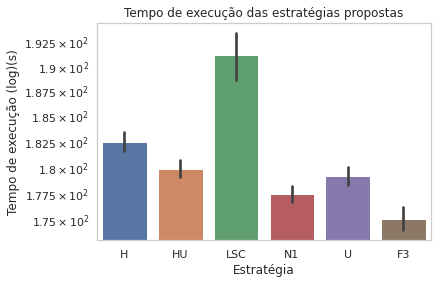

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="strategy", y="time_elapsed", hue = "classifier", data=df_prop).set(xlabel='Estratégia', ylabel='Tempo de execução (log)(s)', yscale = "log", title = "Tempo de execução das estratégias propostas")
plt.legend(title ='Aprendiz')

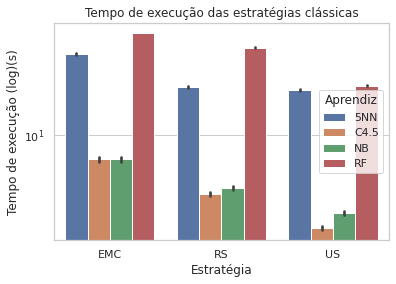

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="strategy", y="time_elapsed", hue = "classifier", data=df_class[df_class.strategy != "QBC"]).set(xlabel='Estratégia', ylabel='Tempo de execução (log)(s)', yscale = "log", title = "Tempo de execução das estratégias clássicas")
plt.legend(title ='Aprendiz')